# Layer contributions in frequency and time domain

### Model

- Air: 2e14 Ohm.m
- 300 m water: 0.3 Ohm.m
- Subsurface: 1 Ohm.m
- Target layer 1km below seafloor, 100 m thick: 100 Ohm.m

### Survey

- Ex-source at x=0, y=0, z=-250
- Ex-receivers inline on the seafloor

In [1]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
seafloor = -300
target_z = -1300
target_d = 100
res_a = 2e14
res_w = 0.3
res_s = 1
res_t = 100

src = (0, 0, seafloor+50)

frequencies = np.logspace(-3, 1, 101)
xfreq = 1.0

times = np.logspace(-1, 2, 101)
xtime = 1

offsets = np.arange(100, 5000, 100)
xoff = 4000

rec = (offsets, offsets*0, seafloor)
xrec = (xoff, 0, seafloor)

finp = {'src': src, 'rec': rec, 'freqtime': xfreq, 'verb': 1}
xfinp = {'src': src, 'rec': xrec, 'freqtime': frequencies, 'verb': 1}

tinp = {'src': src, 'rec': rec, 'freqtime': xtime, 'signal': 0, 'verb': 1}
xtinp = {'src': src, 'rec': (xoff, 0, seafloor), 'freqtime': times, 'signal': 0, 'verb': 1}

# 1. $f$-domain, 1.0 Hz, many offsets

In [4]:
f_w = empymod.dipole(res=res_w, depth=[], **finp)
f_aw = empymod.dipole(res=[res_a, res_w, res_w], depth=[0, seafloor], **finp)
f_ws = empymod.dipole(res=[res_w, res_s, res_s], depth=[0, seafloor], **finp)
f_aws = empymod.dipole(res=[res_a, res_w, res_s], depth=[0, seafloor], **finp)
f_full = empymod.dipole(res=[res_a, res_w, res_s, res_t, res_s],
                        depth=[0, seafloor, target_z, target_z-target_d], **finp)

In [5]:
fdata = [f_w, f_aw, f_ws, f_aws, f_full]
labels = ['Water', 'Air-Water', 'Water-Subsurface', 'Air-Water-Subsurface', 'Inc. Target']

<IPython.core.display.Javascript object>


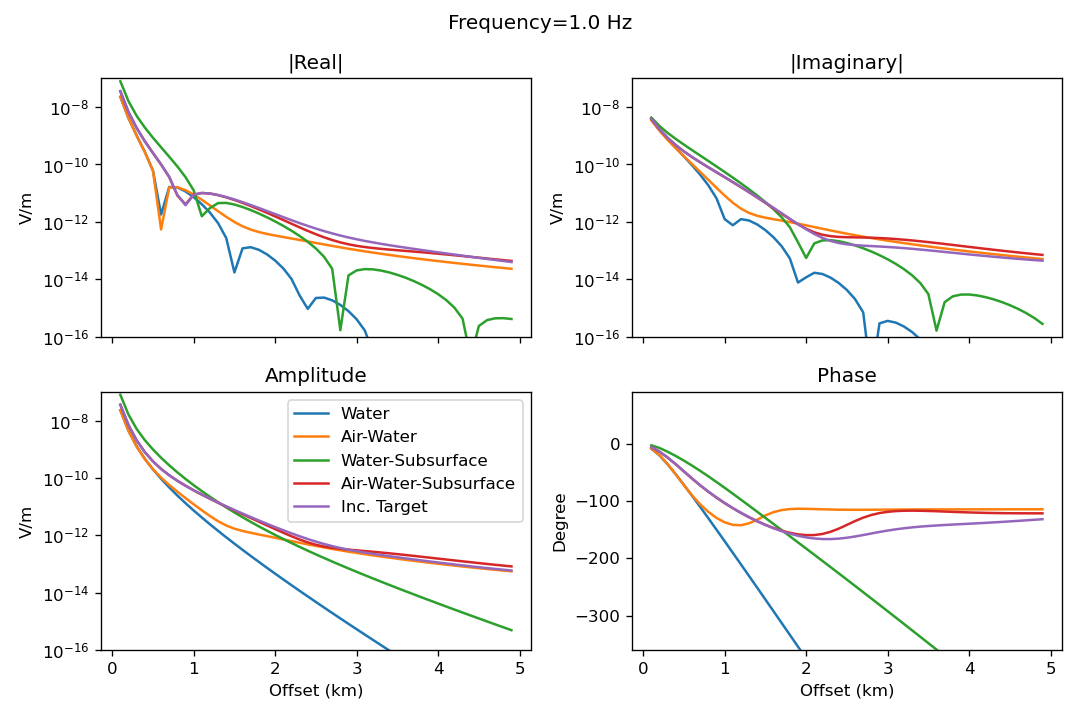

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6), sharex=True)

ax1.set_title(f"|Real|")
ax2.set_title(f"|Imaginary|")
ax3.set_title(f"Amplitude")
ax4.set_title(f"Phase")

for d, l in zip(fdata, labels):
    ax1.plot(offsets/1e3, abs(d.real), label=l)
    ax2.plot(offsets/1e3, abs(d.imag), label=l)
    ax3.plot(offsets/1e3, d.amp(), label=l)
    ax4.plot(offsets/1e3, d.pha(deg=True), label=l)

    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax3.legend()

ax3.set_xlabel('Offset (km)')
ax4.set_xlabel('Offset (km)')

ax1.set_ylabel('V/m')
ax2.set_ylabel('V/m')
ax3.set_ylabel('V/m')
ax4.set_ylabel('Degree')

ax1.set_ylim([1e-16, 1e-7])
ax2.set_ylim([1e-16, 1e-7])
ax3.set_ylim([1e-16, 1e-7])
ax4.set_ylim([-360, 90])

fig.suptitle(f"Frequency={xfreq} Hz")
fig.tight_layout()
fig.show()

# 2. $f$-domain, 4.0 km offset, many frequencies

In [7]:
xf_w = empymod.dipole(res=res_w, depth=[], **xfinp)
xf_aw = empymod.dipole(res=[res_a, res_w, res_w], depth=[0, seafloor], **xfinp)
xf_ws = empymod.dipole(res=[res_w, res_s, res_s], depth=[0, seafloor], **xfinp)
xf_aws = empymod.dipole(res=[res_a, res_w, res_s], depth=[0, seafloor], **xfinp)
xf_full = empymod.dipole(res=[res_a, res_w, res_s, res_t, res_s],
                         depth=[0, seafloor, target_z, target_z-target_d], **xfinp)

In [8]:
xfdata = [xf_w, xf_aw, xf_ws, xf_aws, xf_full]

<IPython.core.display.Javascript object>


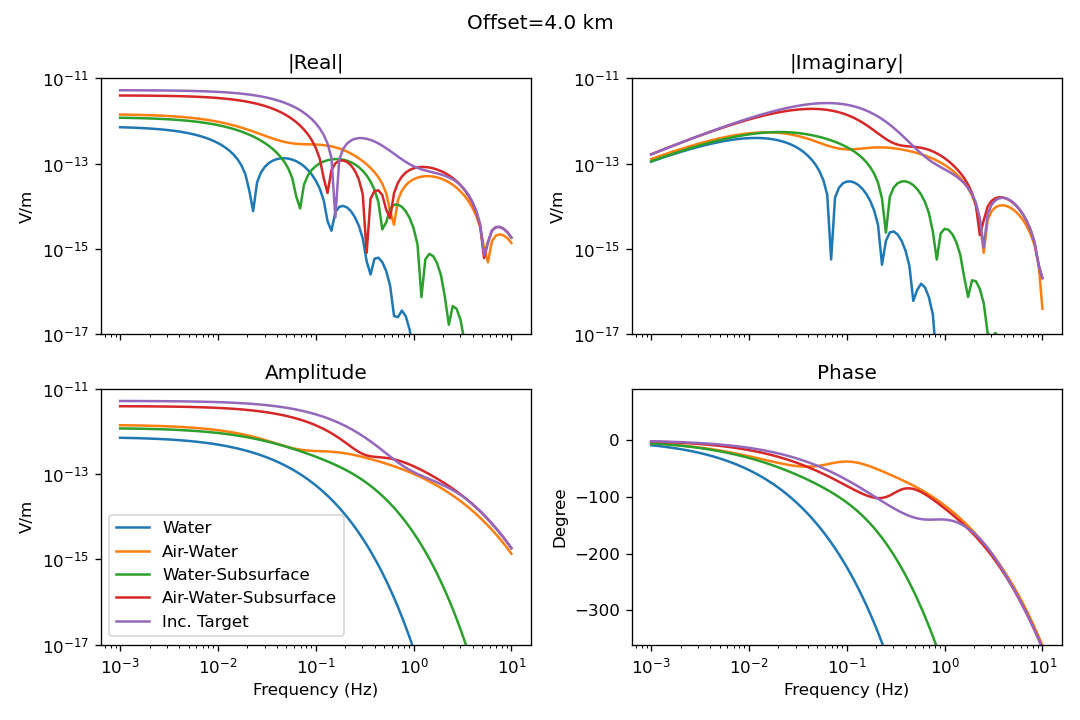

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 6), sharex=True)

ax1.set_title(f"|Real|")
ax2.set_title(f"|Imaginary|")
ax3.set_title(f"Amplitude")
ax4.set_title(f"Phase")

for d, l in zip(xfdata, labels):
    ax1.plot(frequencies, abs(d.real), label=l)
    ax2.plot(frequencies, abs(d.imag), label=l)
    ax3.plot(frequencies, d.amp(), label=l)
    ax4.plot(frequencies, d.pha(deg=True), label=l)

    
ax1.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax3.legend()

ax3.set_xlabel('Frequency (Hz)')
ax4.set_xlabel('Frequency (Hz)')

ax1.set_ylabel('V/m')
ax2.set_ylabel('V/m')
ax3.set_ylabel('V/m')
ax4.set_ylabel('Degree')

ax1.set_ylim([1e-17, 1e-11])
ax2.set_ylim([1e-17, 1e-11])
ax3.set_ylim([1e-17, 1e-11])
ax4.set_ylim([-360, 90])

fig.suptitle(f"Offset={xoff/1e3} km")
fig.tight_layout()
fig.show()

# 3. $t$-domain, 1.0 s, many offsets

In [10]:
t_w = empymod.dipole(res=res_w, depth=[], **tinp)
t_aw = empymod.dipole(res=[res_a, res_w, res_w], depth=[0, seafloor], **tinp)
t_ws = empymod.dipole(res=[res_w, res_s, res_s], depth=[0, seafloor], **tinp)
t_aws = empymod.dipole(res=[res_a, res_w, res_s], depth=[0, seafloor], **tinp)
t_full = empymod.dipole(res=[res_a, res_w, res_s, res_t, res_s],
                        depth=[0, seafloor, target_z, target_z-target_d], **tinp)

tdata = [t_w, t_aw, t_ws, t_aws, t_full]

<IPython.core.display.Javascript object>


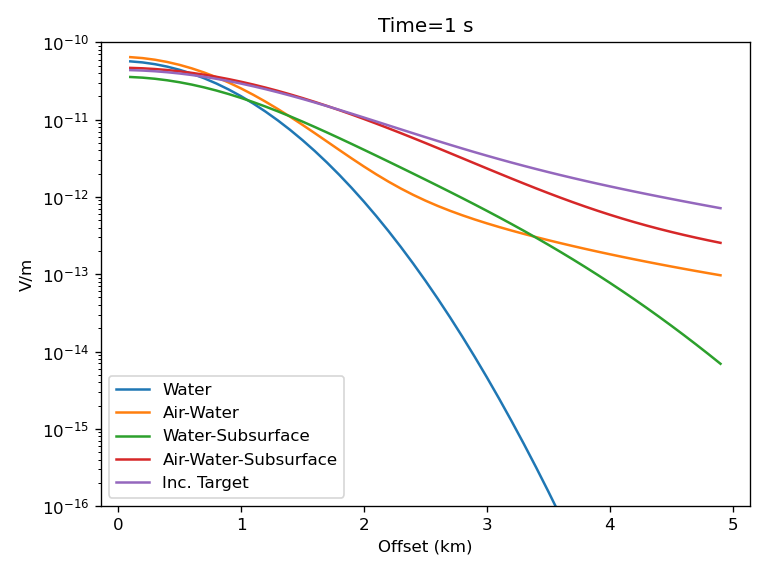

In [11]:
fig, ax = plt.subplots(1, 1)

ax.set_title(f"Time={xtime} s")

for d, l in zip(tdata, labels):
    ax.plot(offsets/1e3, d, label=l)

#ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Offset (km)')
ax.set_ylabel('V/m')

ax.set_ylim([1e-16, 1e-10])

fig.tight_layout()
fig.show()

# 4. $t$-domain, 4 km Offset, many times

In [12]:
xt_w = empymod.dipole(res=res_w, depth=[], **xtinp)
xt_aw = empymod.dipole(res=[res_a, res_w, res_w], depth=[0, seafloor], **xtinp)
xt_ws = empymod.dipole(res=[res_w, res_s, res_s], depth=[0, seafloor], **xtinp)
xt_aws = empymod.dipole(res=[res_a, res_w, res_s], depth=[0, seafloor], **xtinp)
xt_full = empymod.dipole(res=[res_a, res_w, res_s, res_t, res_s],
                         depth=[0, seafloor, target_z, target_z-target_d], **xtinp)

In [13]:
xtdata = [xt_w, xt_aw, xt_ws, xt_aws, xt_full]

<IPython.core.display.Javascript object>


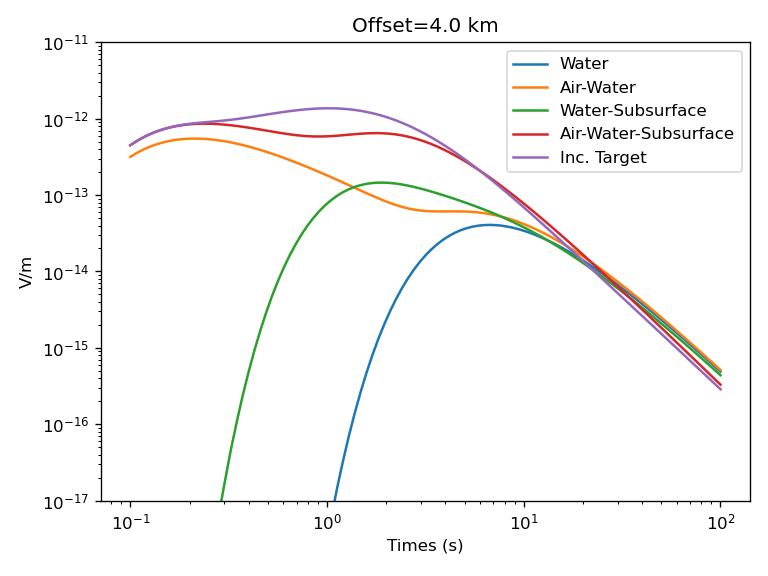

In [14]:
fig, ax = plt.subplots(1, 1)

ax.set_title(f"Offset={xoff/1e3} km")

for d, l in zip(xtdata, labels):
    ax.plot(times, d, label=l)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Times (s)')
ax.set_ylabel('V/m')

ax.set_ylim([1e-17, 1e-11])

fig.tight_layout()
fig.show()

In [15]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Wed Feb 24 17:35:57 2021 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.8.6 | packaged by conda-forge | (default, Dec 26 2020, 05:05:16)
  [GCC 9.3.0]

             numpy : 1.19.5
             scipy : 1.6.0
             numba : 0.51.2
           empymod : 2.0.4
           IPython : 7.19.0
        matplotlib : 3.3.3

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------